Introduction
============

This is interactive notebook regarding "Introduction to path planning". (Author: Björn Hein)

License is based on Creative Commons: Attribution-NonCommercial 4.0 International (CC BY-NC 4.0) (pls. check: http://creativecommons.org/licenses/by-nc/4.0/)

This notebook imports all discussed algorithms and does a comparison

**Attention**: This worksheet has external dependencies 

* to the files "InnoKonz2dEnv.py" or "InnoKonzShapelyEnv.py". These files contain simple 2D environments based on numpy arrays or the shapely library with an interface for the use as collision checking in the algorithms.
* to all modules like "**Algorithm**.py", which contains the corresponding algorithms 

Important links are:

* General Info: http://www.python.org
* Python tutorial http://www.python.org/doc/tut/
* NetworkX http://networkx.github.io/
* NumPy and SciPy Guide http://docs.scipy.org/
* Matplotlib gallery http://matplotlib.sourceforge.net/gallery.html


Remember that:

* you have to press ctrl-return or shift-return, to execute the code in the code sections, only then the variables are "generated" and can be used
* you can execute the whole notebook by Cell->runAll

### Diskussion & grafische Darstellung

## BasicPRM

- Pfadplannung mit über einen Pfad, welcher alle Nodes verbindet
- Hohe Anzahl an Nodes
- 
## VisibilityPRM
- 300 Nodes aufgrund des Konfiguration
- weit verbreitete Nodes und viele Nodes nicht verwendet, Aufhängepunkt zur Optimierung
- direkt verbundene Zwischenzeile (Interims)

## VisibilityPRM mit Optimierung
- Direkt verbundene Zwischenziele
- weniger Nodes
- simplere Pfade im Vergleich zu Lazy oder Basic
- im Vergleich zum unoptimierten Visibilty Ausführungszeitreduktion (3s bei originalem, 0.5s bei Optimierten)
- 

## LazyPRM
- viele Nodes (im Schnitt 470 Nodes)
- komplizierte Wege
- aber extrem schnell
- er schafft nicht beständig alle Benchmarks (66,13%, im Vergleich BasicPRM 55%, Visibility in beiden Varianten 100%
- Verzweigte Benchmarks bereiten Schwierigkeiten

## Durchführungszeit
- "Standard" Visibility PRM benötigt am meisten Zeit
- Optimierter Visibility PRM ist zweitschnellster Algorithmus
- Lazy PRM ist am schnellsten
- Basic hat moderate Durchführungszeit

## Erfolgsrate
- "Standard" Visibility PRM und optimierter Visibility PRM haben nahezu maximale Erfolgsrate
- "Fat Bottleneck" und "Circle of Death" stellen größte Herausforderung dar. Schmale Gänge bereiten Probleme.
  
## Größe der Roadmap
- Optimierter Visibility PRM besitzt kleinste Roadmap
- Lazy PRM hat größte Roadmap
- "Standard" Visibility hat einheitliche Roadmap-Größe
- Basic PRM besitzt moderate Roadmap-Größe

Adding all planners
===========


In [416]:
import sys
from HelperPackage import HelperClass
sys.path.append("templates")
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [417]:
from HelperPackage.IPPerfMonitor import IPPerfMonitor

from BasicPRM import IPVISBasicPRM 
from BasicPRM import IPBasicPRM_Roundtrip

from VisibilityPRM import IPVisibilityPRM_Roundtrip
from VisibilityPRM import IPVISVisibilityPRM

from VisibilityPRM import CC_IPVisibilityPRM_Roundtrip

from LazyPRM import IPLazyPRM_Roundtrip
from LazyPRM import IPVISLazyPRM


Set-up of the test scenario and the configuration for all planner
===================================

Following a procedure to compare all discussed planners are shown:

1. Configuration for every planner is defined
2. The configuration and the planner is stored in the variable setup, a Python dict()
3. the variable setup is then used to uniformly call the planning calls


In [418]:
plannerFactory = dict()

basicConfig = dict()
basicConfig["radius"] = 3
basicConfig["numNodes"] = 200
plannerFactory["basePRM"] = [IPBasicPRM_Roundtrip.BasicPRM, basicConfig, IPVISBasicPRM.basicPRMVisualize]


visbilityConfig = dict()
visbilityConfig["ntry"] = 300
plannerFactory["visibilityPRM"] = [IPVisibilityPRM_Roundtrip.VisPRM, visbilityConfig, IPVISVisibilityPRM.visibilityPRMVisualize ]


visbilityConfig = dict()
visbilityConfig["ntry"] = 300
plannerFactory["CC_visibilityPRM"] = [CC_IPVisibilityPRM_Roundtrip.VisPRM, visbilityConfig, IPVISVisibilityPRM.visibilityPRMVisualize ]

lazyConfig = dict()
lazyConfig["initialRoadmapSize"] = 10
lazyConfig["updateRoadmapSize"]  = 5
lazyConfig["kNearest"] = 8
plannerFactory["lazyPRM"] = [IPLazyPRM_Roundtrip.LazyPRM, lazyConfig, IPVISLazyPRM.lazyPRMVisualize]

In [419]:
class ResultCollection (object):
    
    def __init__(self, plannerFactoryName, planner, benchmark, solution, perfDataFrame):
        self.plannerFactoryName = plannerFactoryName
        self.planner = planner
        self.benchmark = benchmark
        self.solution = solution
        self.perfDataFrame = perfDataFrame

In [420]:
import HelperPackage.IPTestSuite
import importlib

In [421]:
importlib.reload(HelperPackage.IPTestSuite)

<module 'HelperPackage.IPTestSuite' from 'c:\\Users\\andre\\OneDrive - Hochschule Karlsruhe\\HS Karlsruhe\\1. Semester\\Roboterprogrammierung\\Projekt\\Git\\RKIM23RobotProgramDS\\02_eigeneNotebooks\\HelperPackage\\IPTestSuite.py'>

In [422]:
fullBenchList = HelperPackage.IPTestSuite.benchList

for benchmark in fullBenchList:
    print(benchmark.name)

Trap
Bottleneck
Fat bottleneck
B_rush
circle od death


In [423]:
resultList = list()
testList = fullBenchList[:5]

for key,producer in list(plannerFactory.items()):
    HelperClass.HelperClass.printInColor(str(key)+" "+ str(producer), 'yellow')

    for benchmark in testList:
        HelperClass.HelperClass.printInColor("Planning: " + key + " - " + benchmark.name, 'yellow')
        planner = producer[0](benchmark.collisionChecker)
        IPPerfMonitor.clearData()
        

        try:
            resultList.append(ResultCollection(key,
                                        planner, 
                                        benchmark, 
                                        planner.planRoundPath(benchmark.startList,benchmark.interimGoalList,benchmark.goalList,producer[1]),
                                        IPPerfMonitor.dataFrame()),)



        except Exception as e:
            HelperClass.HelperClass.printInColor("PLANNING ERROR ! PLANNING ERROR ! PLANNING ERROR", 'red')
            HelperClass.HelperClass.printInColor(e, 'red')
            import traceback
            HelperClass.HelperClass.printInColor(traceback.print_exc(), 'red')

            pass

        

c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\networkx\drawing\nx_pylab.py:437: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(
c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


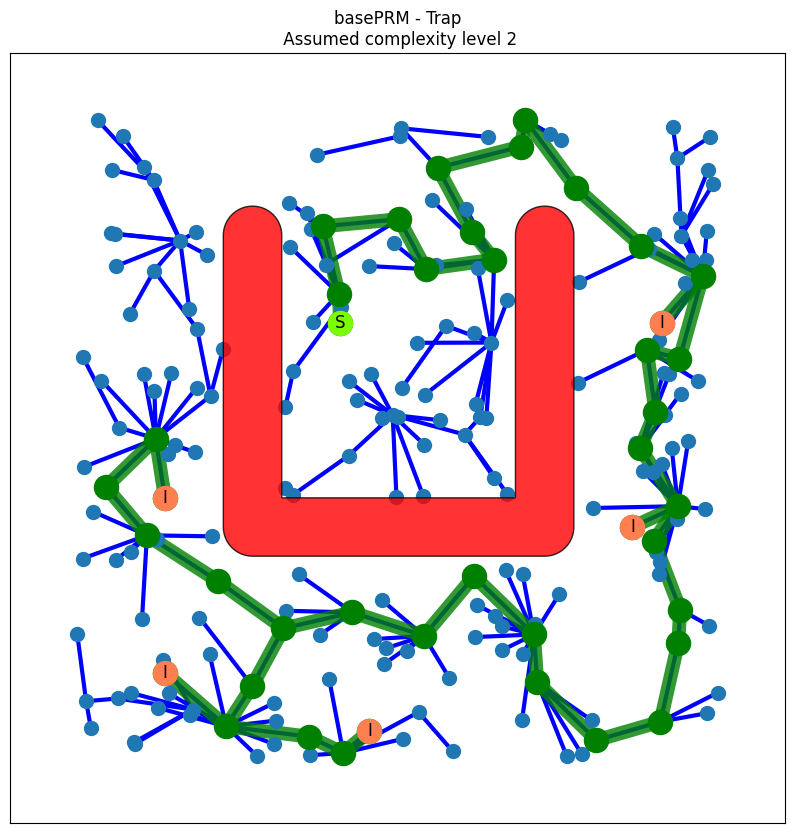

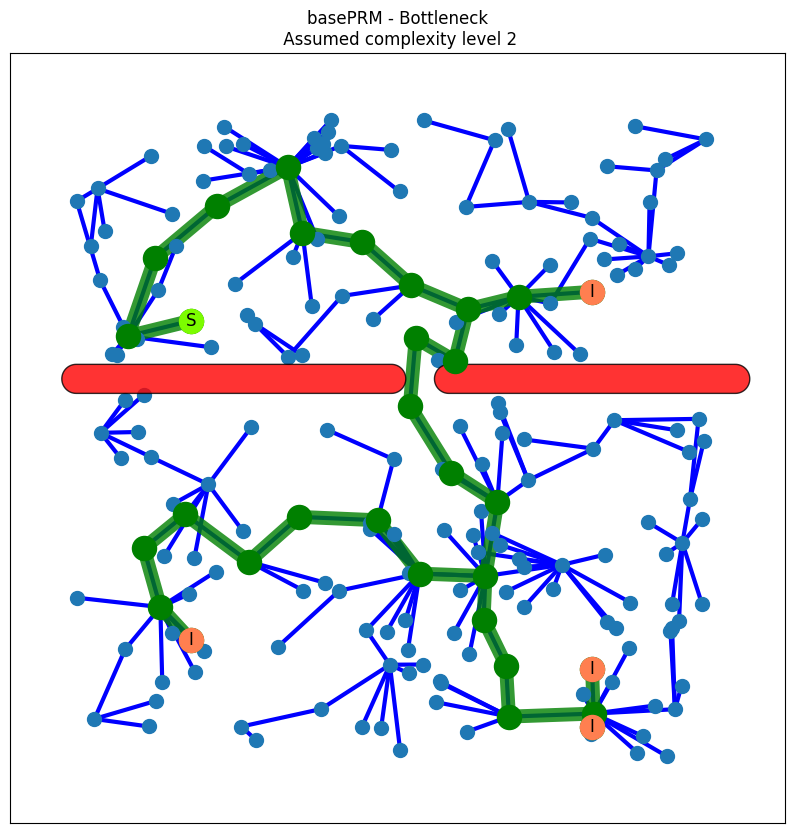

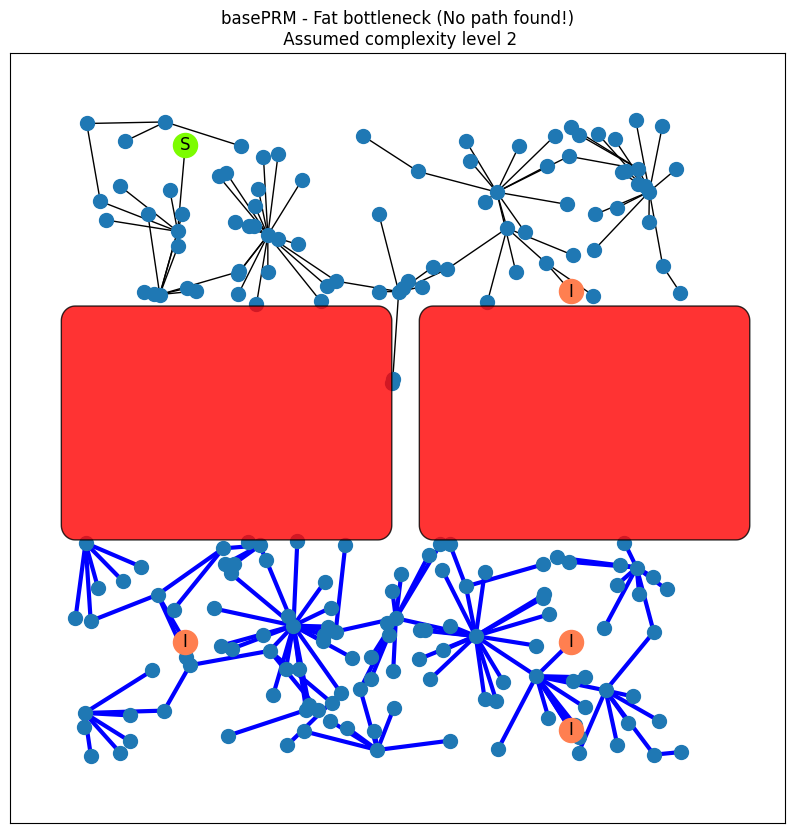

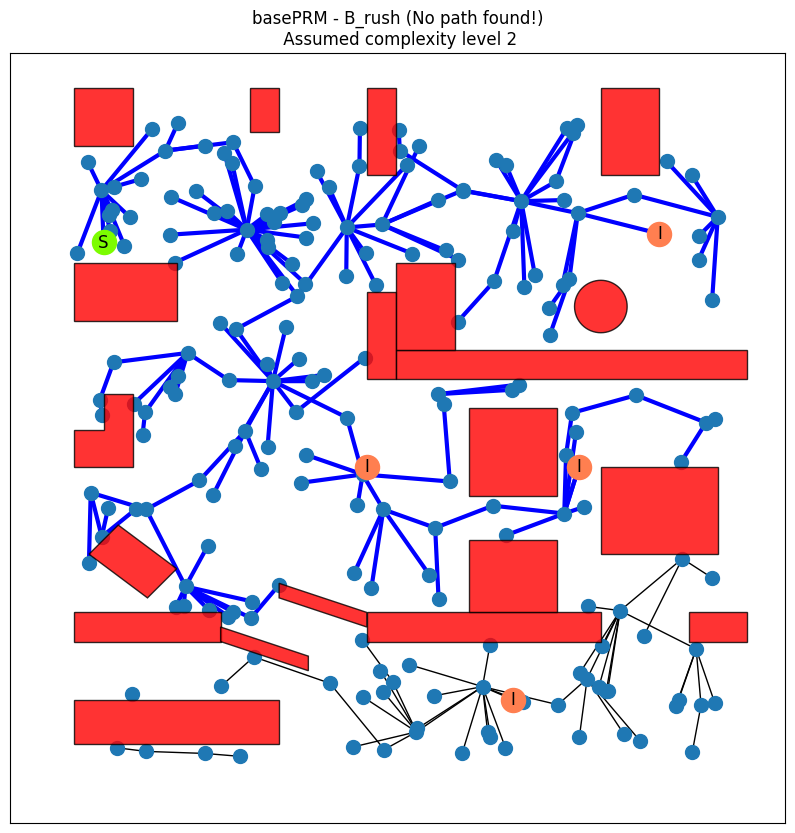

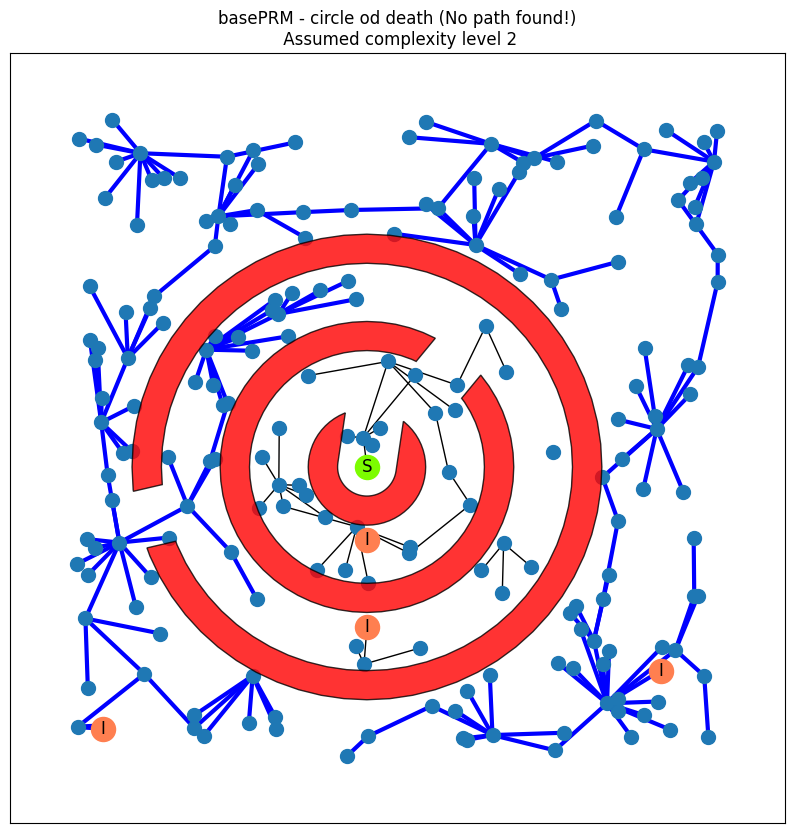

In [424]:
import matplotlib.pyplot as plt

for result in resultList:
    fig_local = plt.figure(figsize=(10,10))
    ax = fig_local.add_subplot(1,1,1)
    title = result.plannerFactoryName + " - " + result.benchmark.name
    if result.solution == []:
        title += " (No path found!)"
    title += "\n Assumed complexity level " + str(result.benchmark.level)
    ax.set_title(title)

    try:
        #IPVISBasicsPRM.basicPRMVisualize(result.planner, result.solution, ax=ax, nodeSize=100))
        plannerFactory[result.plannerFactoryName][2](result.planner, result.solution, ax=ax, nodeSize=100)


    except Exception as e:
        print ("Error")
        print(e)
        pass
    

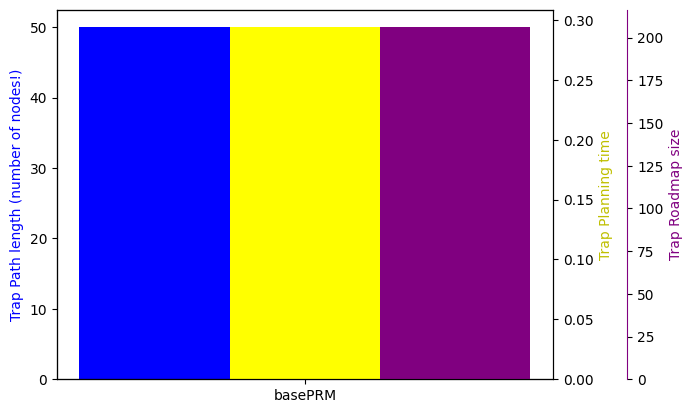

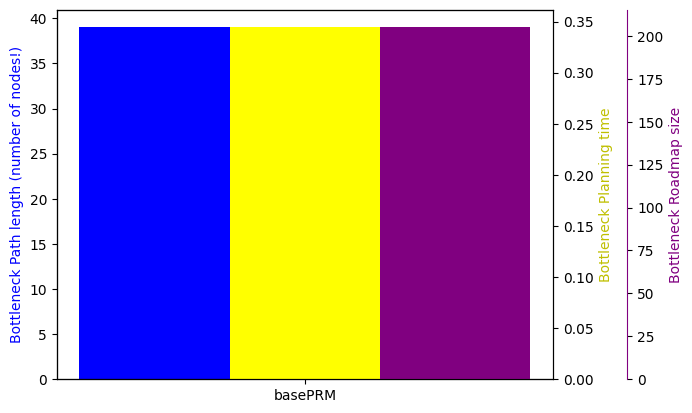

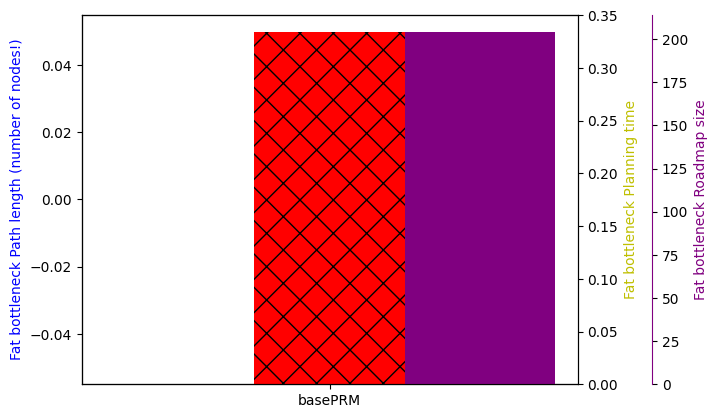

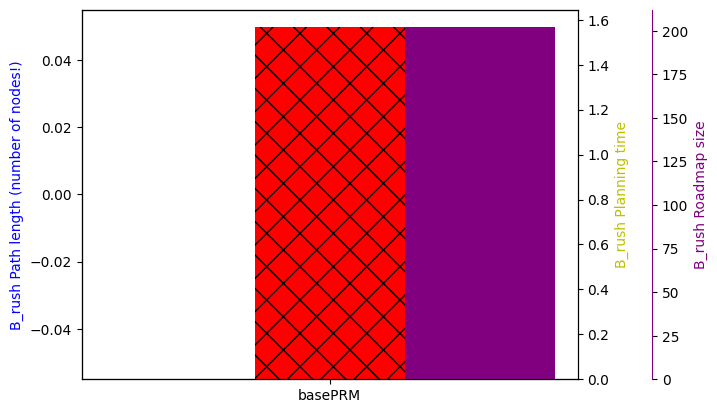

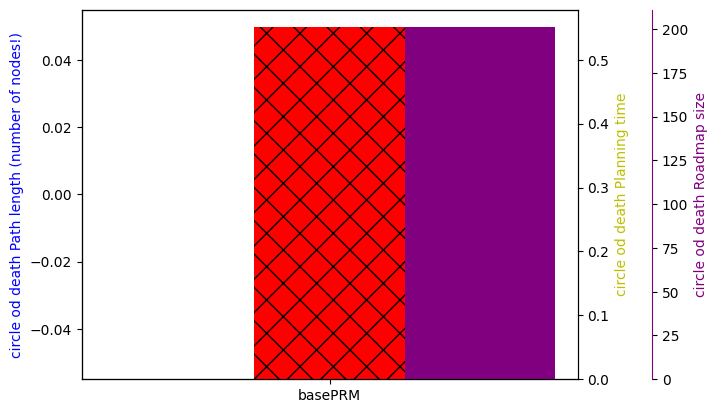

In [425]:
import numpy as np
for bench in testList:
    title = bench.name
    pathLength = dict()
    planningTime = dict()
    roadmapSize  = dict()
    
    try:
        for result in resultList:
            if result.benchmark.name == bench.name:
                #print result.benchmark.name  + " - " +  result.plannerFactoryName, len(result.solution)
                pathLength[result.plannerFactoryName] = len(result.solution)
                planningTime[result.plannerFactoryName] = result.perfDataFrame.groupby(["name"]).sum(numeric_only=True)["time"]["planRoundPath"]
                roadmapSize[result.plannerFactoryName] = result.planner.graph.size()


        fig, ax = plt.subplots()

        width = 0.2

        ax.bar(np.arange(len(pathLength.keys())), pathLength.values(),width, color="blue")
        ax.set_ylabel(title + " Path length (number of nodes!)", color="blue")
        ax.set_xticks(np.arange(len(pathLength.keys())) + width)
        ax.set_xticklabels(pathLength.keys())

        ax2 = ax.twinx()
        bar = ax2.bar(np.arange(len(pathLength.keys()))+width, planningTime.values(),width, color="red")
        ax2.set_ylabel(title + " Planning time", color="y")

        # Add coloring and patterns on axis two
        hatches = ['x' if length==0 else '' for length in pathLength.values()]
        color   = ['red' if length==0 else 'yellow' for length in pathLength.values()]
        for i,thisbar in enumerate(bar.patches):
            thisbar.set_facecolor(color[i])
            thisbar.set_hatch(hatches[i])

        # Multiple axes 
        ax3 = ax.twinx()
        ax3.bar(np.arange(len(pathLength.keys()))+2*width, roadmapSize.values(),width, color="purple")
        ax3.set_ylabel(title + " Roadmap size",  color="purple")
        ax3.spines['right'].set_position(('axes', 1.15))
        ax3.spines['right'].set_color("purple")
    except:
        pass


    
        
    

result.perfDataFrame.groupby(["name"]).sum()

In [426]:
result.perfDataFrame.groupby(["name"]).sum(numeric_only=True)

,time
name,
_getRandomFreePosition,0.007001
_inSameConnectedComponent,0.035118
_learnRoadmapNearestNeighbour,0.527849
_nearestInterim,0.001001
_nearestNeighbours,0.103714
lineInCollision,0.398491
planRoundPath,0.550858
pointInCollision,0.371697


In [427]:
resultBasic = resultList[:5]
resultVisibility = resultList[5:10]
resultLazy = resultList[10:]

In [428]:
for i in range(len(resultBasic)):
    print(resultBasic[i].perfDataFrame.groupby(["name"]).sum(numeric_only=True).sum()["time"])


0.9899067878723145
1.1740379333496094
1.1412217617034912
6.029521703720093
1.9957289695739746


In [429]:
for i in range(len(resultVisibility)):

    print(resultVisibility[i].perfDataFrame.groupby(["name"]).sum(numeric_only=True).sum())


In [430]:
for i in range(len(resultLazy)):

    print(resultLazy[i].perfDataFrame.groupby(["name"]).sum(numeric_only=True).sum())


# Aufgabe 2

Nachfolgend werden die möglichen Ansätze ausformuliert.

### Eigene Überlegung: Gerade bestehend aus zusammengesetzten Hilfspunkten mehrerer Mittelpunkten

Um die beiden Interimspunkte (=Zwischenziele) werden Hilfspunkte in einer 3x3 - Matrix gesetzt. Dabei ist der Interimspunkt die Mitte der Spur der Matrix beziehungsweise steht an der Stelle M22.
Zwischen den außenliegenden Hilfspunkten werden Verbindungen eingezeichnet, sofern diese kollisionsfrei sind. Die rote Gerade zeigt, dass es nicht es eine Kollision gibt. Daher wird diese nicht weiter berücksichtigt.
Diese Verbindungen haben jeweils einen Mittelpunkt, welcher sich mit der Hälfte des Abstandes zwischen den beiden Hilfspunkten berechnen lässt.
Zwischen diesen drei Mittelpunkten (durch größere Matrix mehr möglich) kann eine Gerade aufgestellt werden. Auf dieser befindet sich auch der Überschleifpunkt.

Mit dem braunen Pfeil wurde der gewünschte Abstand zwischen Hindernis und dem Überschleifpunkt gewählt. 
Dieser ist frei wählbar.Dies wäre über einen zuvor festgelegten Parameter möglich.
Diese neue Kurve wird auf Kollision überprüft, im Falle einer Kollision wird ein Kurve mit anderem Abstand gewählt.
Falls diese Methodik an einem Roboter angewandt wird, sollte bei dem Abstand und dem Winkel darauf geachtet werden, dass das zum Robotertyp passt und Verschleiß etc. reduziert.


Nachfolgend eine Skizze.

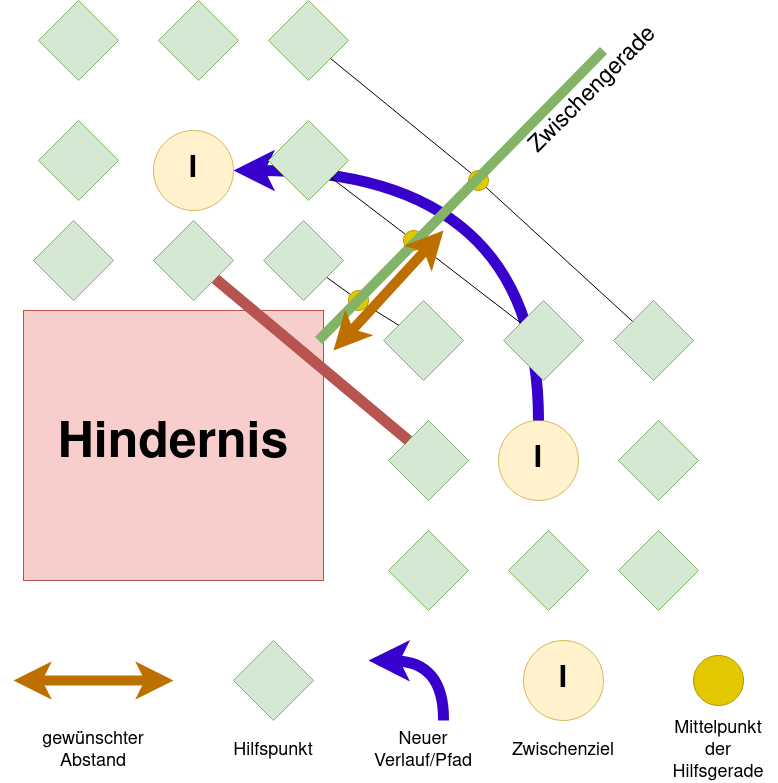

## Glättung mit Latombe-Verfahren: 

Mit dem LaTombe Verfahren kann ebenso eine Glättung erreicht werden.
Sobald ein kollisionsfreier Pfad besteht, werden mit Zufallselementen Pfadoptionen generiert und Kollisionen mittels Wahrscheinlichkeiten minimiert.

Übertragen auf unser Beispiel würden die kollisionenfreien Pfade zwischen jeweils zwei Zwischenzielen dazu genutzt werden. Diese Pfade würden dann jeweils mit dem LaTombe Verfahren optimiert und anschließend zusammengesetzt.

## Glättung Bechtold Glavina:
Ebenso kann das Bechthold Glavina Verfahren angewandt. Hierbei kann ein Epsilon bestimmt werden. Dabei wird der Abstand zwischen zwei Nodes bestimmt und dabei Zwischennodes erstellt, die eben einen glätteren Ablauf des ganzen ermöglichen.


## Optimierung durch Duplikatsentfernung

Ebenso haben wir die Pfade gekürzt, indem wir doppelte Pfadelemente aus dem Pfad entfernt haben.
Somit hat der Pfad unnötige Sequenzen gespart.

Beispiel:

VORHER: Start -> 1 -> Interim1 -> 5 -> 6 -> 7-> 5 -> 6 -> 7 -> Interim 2 -> ...

NACHHER: Start -> 1 -> Interim1 -> .......5 -> 6 -> 7........-> Interim 2 -> ...